In [46]:
import numpy as np
import matplotlib.pyplot as plt
import os #untuk import dataset
from math import log #rumus glcm
import cv2 
import pandas as pd #untuk nampilin data frame
from math import ceil
# from sklearn import datasets 
# from sklearn.model_selection import train_test_split 
# from sklearn import svm
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import classification_report
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

## DISPLAY IMAGE

In [47]:
def tampilkanGambar(images, titles, row, col):
    plt.figure(figsize=(10,10))
    for i in range(row):
        for j in range (col):
            plt.subplot(row,col,i*col+(j+1))
            plt.grid(color="none")
            plt.imshow(images[i*col+j],'gray')
            plt.title(titles[i*col+j])
    plt.tight_layout()
    plt.show()

## FILTERING

In [48]:
def sorting(arr): #di sort ini harus jd 1 array
    for i in range(len(arr)): 
        swap = i + np.argmin(arr[i:])
        (arr[i], arr[swap]) = (arr[swap], arr[i])
    return arr

In [49]:
def flatArray(arr): #buat jadiin array 1 dimensi
    row, col = arr.shape 
    flat=[]
    for i in range (row):
        for j in range (col):
            flat.append(arr[i][j]) #buat nambahin nilai ke list
    return flat

In [50]:
def median(image,windowHeight,windowWidth):
    pad = np.pad(image,(windowHeight,windowWidth),mode='edge')
    median = np.zeros(image.shape, dtype=np.uint8)
    for i in range(windowHeight,len(pad)-windowHeight):
        for j in range(windowWidth,len(pad)-windowWidth):
            window = flatArray(pad[i-windowHeight:i,j-windowWidth:j])
            window = sorting(window)
            median[i-windowHeight,j-windowWidth] = window[ceil(len(window)/2)]
    return median

## MORFOLOGY OPERATION (erosi)

In [51]:
def fit(window,SE): 
    for i in range(len(SE)):
      for j in range(len(SE)):
        if(SE[i][j]==1 and window[i][j]==0): 
          return 0
    return 1
def erosi(image,SE):
    erosi = np.zeros(image.shape, dtype=np.uint8)
    row, col = image.shape
    # melakukan perulangan pada window center image
    for i in range(row-len(SE)):
        for j in range(col-len(SE)):
            window = image[i:i+len(SE),j:j+len(SE)]
            # mengambil nilai pada fungsi fit, jika fit maka bernilai 1 jika tidak maka 0
            erosi[i][j] = fit(window,SE)
    return erosi

## Threshold

In [52]:
def convertBinary(image):
    ret, binary = cv2.threshold(image,30,255,cv2.THRESH_BINARY)
    return binary

In [53]:
def getObject(image): #ini kayanya maksudnya get object
    ret,object = cv2.threshold(image,118,255,cv2.THRESH_BINARY)
    object-=255
    return object

In [54]:
#untuk erosi
SE = [[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]]

## SEGMENTATION

In [55]:
def segmentation(mainImage, grayImage): #buat maskingnya 
    object=getObject(grayImage)
    erode = erosi(object, SE)
    medObject = median(erode, 4, 4) 
    maskObject = cv2.bitwise_and(mainImage, mainImage, mask=medObject) #buat maskingnya
    return maskObject

In [56]:
def drawObject(mainImage, object): #buat drawnya, ini juga kayanya buat draw objectnya
    grayObject = cv2.cvtColor(object, cv2.COLOR_RGB2GRAY)
    binaryObject = convertBinary(grayObject)
    contours, hierarchy = cv2.findContours(binaryObject, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    objectDraw = cv2.drawContours(mainImage, contours, -1, (0,255,0), 2)
    return objectDraw

## GET DATASET

In [58]:
dataset_dir = "dataset/"
images = []
labels = []
names = []
gilt_fish = 1 #nandain buat mulai dari 1
red_fish = 1 #nandain buat mulai dari 1
sea_fish = 1 #nandain buat mulai dari 1
for sub_folder in os.listdir(dataset_dir): 
    sub_folder_files = os.listdir(os.path.join(dataset_dir, sub_folder))
    for i, filename in enumerate(sub_folder_files):
        img = cv2.imread(os.path.join(dataset_dir, sub_folder, filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (255,255)) #resize jadi 255
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        maskObject = segmentation(img, gray)
        draw = drawObject(img, maskObject)
        if (sub_folder == 'Gilt Head Bream'): 
            plt.imsave("mask_fish/Mask-gilt-head-bream-"+str(gilt_fish)+".png", maskObject)
            plt.imsave("draw_fish/Draw-gilt-head-bream-"+str(gilt_fish)+".png", draw)
            gilt_fish+=1
        elif(sub_folder == 'Red Mullet'): 
            plt.imsave("mask_fish/Mask-red-mullet-"+str(red_fish)+".png", maskObject)
            plt.imsave("draw_fish/Draw-red mullet-"+str(red_fish)+".png", draw)
            red_fish+=1
        else:
            plt.imsave("mask_fish/Mask-sea-bass-"+str(sea_fish)+".png", maskObject)
            plt.imsave("draw_fish/Draw-sea-bass-"+str(sea_fish)+".png", draw)
            sea_fish+=1
        grayObject = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        images.append(grayObject)
        labels.append(sub_folder)
        names.append(filename)
images = np.array(images)
labels = np.array(labels)
names = np.array(names)

## PLOTTING 1 IMAGE

In [59]:
imgBGR = cv2.imread('dataset/Red Mullet/1.png')

In [60]:
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

In [61]:
img = cv2.resize(imgRGB, (255,255))

In [62]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [63]:
object=getObject(gray)

In [64]:
erode = erosi(object, SE)

In [65]:
medObject = median(erode, 4, 4)

In [66]:
maskObject = cv2.bitwise_and(img, img, mask=medObject)

In [67]:
grayObject = cv2.cvtColor(maskObject, cv2.COLOR_RGB2GRAY)

In [68]:
binaryObject = convertBinary(grayObject)

In [69]:
contours, hierarchy = cv2.findContours(binaryObject, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
objectDraw = cv2.drawContours(img, contours, -1, (0,255,0), 2)

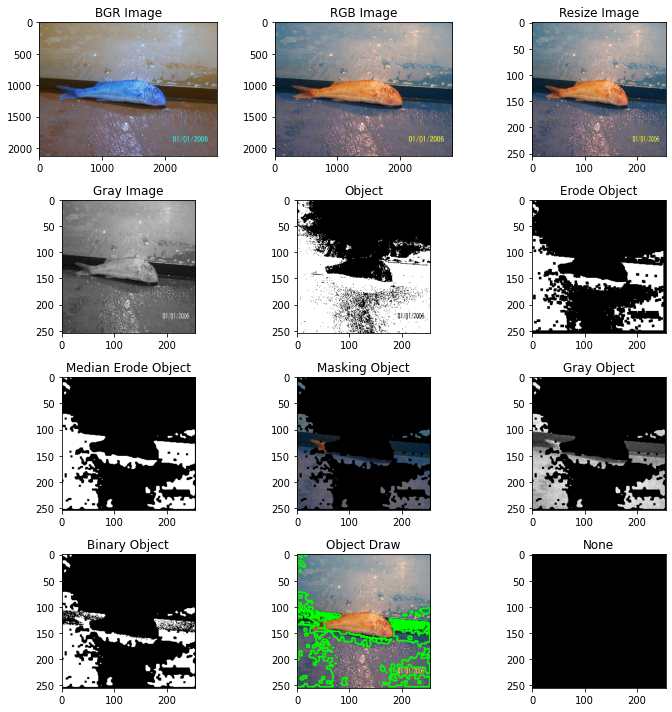

In [70]:
none = np.zeros(img.shape)
img = cv2.resize(imgRGB, (255,255))
titles = ['BGR Image','RGB Image', 'Resize Image',
    'Gray Image', 'Object', 'Erode Object',
    'Median Erode Object', 'Masking Object', 'Gray Object',
    'Binary Object', 'Object Draw', 'None']
hasilimage = [imgBGR,imgRGB, img,
    gray, object, erode,
    medObject, maskObject, grayObject,
    binaryObject, objectDraw, none]
tampilkanGambar(hasilimage, titles, 4, 3)

## GLCM

In [71]:
def transpose(matrix):
    matrix_transpose = []
    row,col = matrix.shape
    for i in range(row):
        mRow = []
        for j in range(col):
            mRow.append(matrix[j][i])
        matrix_transpose.append(mRow)
    return matrix_transpose

In [72]:
def dataSum(image):
    result = 0
    for i in range (len(image)):
        for j in range(len(image)):
            result+=image[i,j]
    return result

In [73]:
def normalization(image):
    row, col = image.shape
    n = dataSum(image)
    for i in range(row):
        for j in range(col):
            image[i,j]/=n
    return image

In [74]:
def cooccurance (image, dimention, degree):
    row, col = image.shape
    matrixCo = np.zeros([dimention+1,dimention+1])
    if(degree == 0):
        for i in range(row):
            for j in range(col):
                if(j+1 < col):
                    matrixCo[image[i,j], image[i,j+1]] += 1
    elif (degree == 45):
        for i in range(row):
            for j in range(col):
                if(i-1 >= 0 and j+1 < col):
                    matrixCo[image[i,j], image[i-1,j+1]] += 1
    elif (degree == 90):
        for i in range(row):
            for j in range(col):
                if(i+1 < row and j+1 < col):
                    matrixCo[image[i,j], image[i+1,j]] += 1
    elif (degree == 135):
        for i in range(row):
            for j in range(col):
                if(i+1 < row and j+1 < col):
                    matrixCo[image[i,j], image[i+1,j+1]] += 1
    trans = transpose(matrixCo)
    sumMatrix = matrixCo+trans
    glcm = normalization(sumMatrix)
    return glcm

In [75]:
#ini fitur untuk GLCM nya (kontras, disimilaritas, homogenitas, entropi, ASM (Angular Second Moment), energi, dan korelasi)
#untuk setiap sudut (0, 45, 90, 135)
def mean(image):
    meanX=meanY= 0
    for i in range (len(image)):
        for j in range(len(image)):
            meanX += i * image[i,j]
            meanY += j * image[i,j]
    return meanX, meanY
def tao(image):
    taoX=taoY=0
    meanX,meanY= mean(image)
    for i in range (len(image)):
        for j in range(len(image)):
            taoX += pow((i-meanX),2)*image[i,j]
            taoY += pow((j-meanY),2)*image[i,j]
    return taoX, taoY
def extraction(image):
    energy=homogenity=entropy=contrast=disimilarity=correlation=ASM=0
    meanX, meanY = mean(image)
    taoX, taoY = tao(image)
    for i in range (len(image)):
        for j in range (len(image)):
            contrast += image[i,j]*pow((i-j),2)
            disimilarity += image[i,j]*abs(i-j)
            # homogenity += image[i,j]/1+(pow((i-j),2))
            homogenity += image[i,j]/1+abs(i-j)
            if image[i,j] > 0:
                entropy += -(image[i,j] * log(image[i,j]))
            ASM += pow(image[i,j],2)
            correlation+=((i-meanX)*(j-meanY)*image[i,j])/pow((taoX*taoY),1/2)
    energy = pow(ASM, 1/2)
    return contrast,disimilarity,homogenity,entropy,ASM,energy,correlation

In [76]:
def getGLCM(images):
    glcmImage = []
    for i in range(len(images)):
        glcm = []
        max = images[i].max()
        glcm.append(cooccurance(images[i],max,0))
        glcm.append(cooccurance(images[i],max,45))
        glcm.append(cooccurance(images[i],max,90))
        glcm.append(cooccurance(images[i],max,135))
        glcmImage.append(glcm)
    return glcmImage

In [77]:
csv = []
index = 0
for i in getGLCM(images):
    extract = []
    extract.append(names[index])
    extract.append(labels[index])
    index+=1
    for img in i:
        contrast,disimilarity,homogenity,entropy,ASM,energy,correlation = extraction(img)
        extract.append(contrast)
        extract.append(disimilarity)
        extract.append(homogenity)
        extract.append(entropy)
        extract.append(ASM)
        extract.append(energy)
        extract.append(correlation)
    csv.append(extract)

In [78]:
header = ['Name','Label','Contrast0','Dissimilarity0','Homogenity0','Entropy0','ASM0','Energy0','Correlation0'
           ,'Contrast45','Dissimilarity45','Homogenity45','Entropy45','ASM45','Energy45','Correlation45'
           ,'Contrast90','Dissimilarity90','Homogenity90','Entropy90','ASM90','Energy90','Correlation90'
           ,'Contrast135','Dissimilarity135','Homogenity135','Entropy135','ASM135','Energy135','Correlation135']
df = pd.DataFrame(csv, columns=header)

In [90]:
df.to_csv(r'result.csv', index=False)

In [91]:
df

,Name,Label,Contrast0,Dissimilarity0,Homogenity0,Entropy0,ASM0,Energy0,Correlation0,Contrast45,...,ASM90,Energy90,Correlation90,Contrast135,Dissimilarity135,Homogenity135,Entropy135,ASM135,Energy135,Correlation135
0,1.JPG,Gilt Head Bream,580.300401,11.442041,5.592321e+06,7.492016,0.023707,0.153969,0.892220,820.021375,...,0.022722,0.150738,0.890404,796.770848,14.536456,5.592321e+06,7.655139,0.018097,0.134527,0.852295
1,10.JPG,Gilt Head Bream,918.621229,14.547584,5.592321e+06,7.591785,0.041002,0.202489,0.815419,1302.174143,...,0.038344,0.195815,0.797544,1336.612189,19.315426,5.592321e+06,7.798568,0.030898,0.175777,0.731341
2,100.JPG,Gilt Head Bream,445.776656,9.789378,5.592321e+06,7.834885,0.016431,0.128185,0.909608,692.282380,...,0.016532,0.128575,0.892679,721.095062,12.774614,5.592321e+06,7.962246,0.012998,0.114010,0.853821
3,11.JPG,Gilt Head Bream,919.807195,14.592620,5.527041e+06,7.681531,0.036726,0.191640,0.795500,1304.788502,...,0.033349,0.182617,0.773414,1257.730423,18.633052,5.527041e+06,7.876727,0.027787,0.166694,0.720474
4,12.JPG,Gilt Head Bream,607.379435,12.817415,5.592321e+06,7.909771,0.024502,0.156531,0.835800,824.232562,...,0.022982,0.151599,0.825105,822.166749,15.811334,5.592321e+06,8.064105,0.019166,0.138440,0.777871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,95.JPG,Sea Bass,466.817029,11.243801,5.527041e+06,7.879633,0.019164,0.138436,0.848895,705.050329,...,0.017897,0.133779,0.820146,762.062419,14.675290,5.527041e+06,8.033894,0.014447,0.120197,0.752790
296,96.JPG,Sea Bass,445.858546,9.931172,5.592321e+06,7.745023,0.019568,0.139887,0.890947,681.372218,...,0.018164,0.134776,0.873892,715.800453,13.267190,5.592321e+06,7.937213,0.015040,0.122638,0.824294
297,97.JPG,Sea Bass,324.166574,9.037502,5.592321e+06,7.990372,0.013948,0.118100,0.907922,643.729772,...,0.011613,0.107762,0.846391,640.381471,13.078136,5.592321e+06,8.226857,0.009972,0.099860,0.817044
298,98.JPG,Sea Bass,538.734985,11.040652,5.592321e+06,7.660476,0.023746,0.154098,0.874423,814.334971,...,0.022452,0.149841,0.859735,789.568107,14.307273,5.592321e+06,7.847816,0.018533,0.136135,0.815672
